In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
reviews = pd.read_pickle('../data/revdense.pk')
keywords =  pd.read_pickle('../data/keywords.pk')
recipe_ids = list(set(keywords.index).intersection(set(reviews.RecipeId.values)))
keywords = keywords[keywords.index.isin(recipe_ids)]
reviews = reviews[reviews['RecipeId'].isin(recipe_ids)]
reviews['Keywords'] = [keywords['Keywords'][recipe] for recipe in reviews.RecipeId]

In [3]:
keywords

,Name,KeywordsTitle,Keywords
RecipeId,,,
56,buttermilk pie,[pie],"[pie, bear, dessert, sweet, easy, oven]"
76,alfredo sauce,[sauce],"[microwave, sauce, european, sauces, birthday,..."
220,chocolate zucchini bread,[chocolate],"[breads, vegetable, chocolate, sweet, weeknigh..."
246,lee's hot crab dip,[crab],"[crab, oven]"
468,maple salmon,[],"[chard, potato, healthy, easy, roast, spring, ..."
...,...,...,...
413122,my thai sesame noodles,"[thai, noodle]","[noodle, thai, spaghetti, chicken, sweet, easy..."
413638,decadent twice baked potatoes,[potato],"[baking, easy, potato, < 4 hours]"
420398,ice cubes,[],"[beverages, freezer, egg free, weeknight, easy..."


In [3]:
easy_words= [ 'beginner cook', 'easy','simple'
]
reviews['diff_words'] = reviews['Keywords'].apply(lambda x:list(set(x).intersection(set(easy_words))))
reviews['Difficulty'] = reviews['diff_words'].apply(len).apply(lambda x:min(x,1))

array([[<Axes: title={'center': 'Difficulty'}>]], dtype=object)

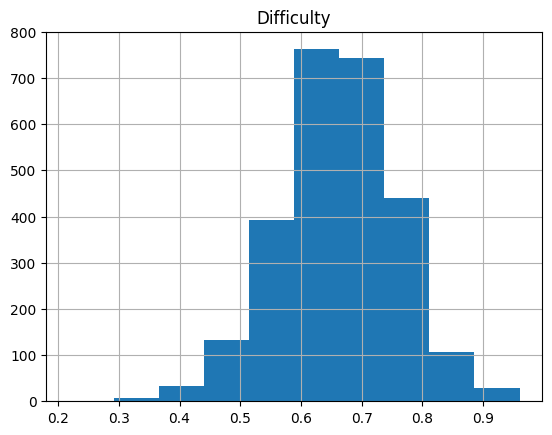

In [4]:
reviews[['UserId','Difficulty']].groupby('UserId').mean().hist()